<a href="https://colab.research.google.com/github/Bhoomij123/Python/blob/main/DA_AG_018_Anomaly_Detection_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DA-AG-018: Anomaly Detection & Time Series Assignment


**Total Marks: 100**  
This notebook contains theory and practical implementation for all questions.


## Question 1: What is Anomaly Detection? Explain its types.


**Anomaly Detection** identifies unusual patterns that do not conform to expected behavior.

### Types:
- **Point Anomaly:** Single unusual data point  
  *Example:* Sudden huge credit card transaction.

- **Contextual Anomaly:** Depends on context (time/location)  
  *Example:* High temperature in winter.

- **Collective Anomaly:** Group of points anomalous together  
  *Example:* Continuous spike in network traffic.


## Question 2: Compare Isolation Forest, DBSCAN, and LOF


| Algorithm | Approach | Use Case |
|---------|---------|---------|
| Isolation Forest | Tree-based isolation | Large, high-dim data |
| DBSCAN | Density-based clustering | Spatial data |
| LOF | Local density comparison | Local anomalies |


## Question 3: Components of Time Series


- **Trend:** Long-term increase/decrease  
- **Seasonality:** Repeating fixed patterns  
- **Cyclic:** Long-term cycles  
- **Irregular:** Random noise


## Question 4: Stationarity


A stationary series has constant mean and variance.
- Tested using ADF Test
- Achieved using differencing or log transform


## Question 5: AR vs MA vs ARIMA vs SARIMA vs SARIMAX


| Model | Description |
|-----|------------|
| AR | Past values |
| MA | Past errors |
| ARIMA | AR + MA + Differencing |
| SARIMA | Seasonal ARIMA |
| SARIMAX | SARIMA + external vars |


## Question 6: Time Series Decomposition (AirPassengers)

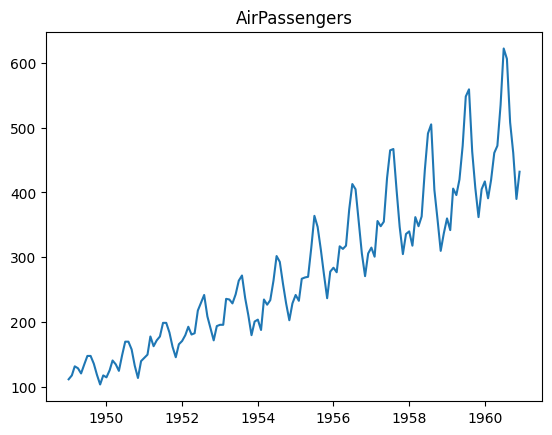

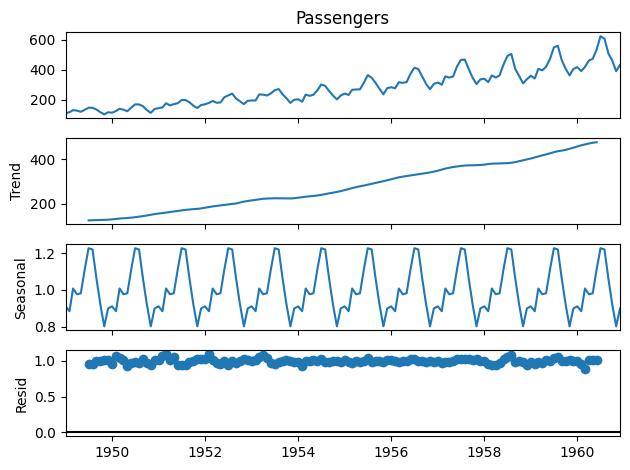

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv(
    "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv",
    parse_dates=['Month'],
    index_col='Month'
)

plt.plot(data)
plt.title("AirPassengers")
plt.show()

decomposition = seasonal_decompose(data['Passengers'], model='multiplicative')
decomposition.plot()
plt.show()


## Question 7: Isolation Forest Anomaly Detection

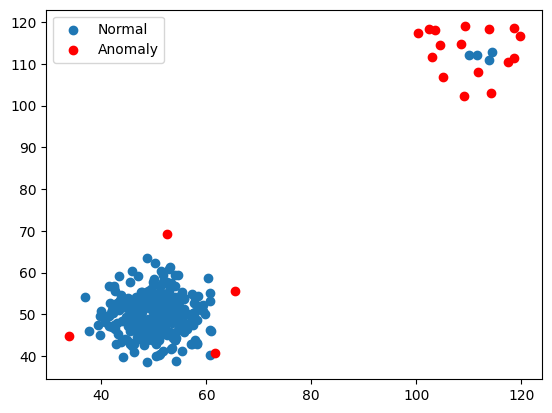

In [2]:

import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.normal(50, 5, (300, 2))
outliers = np.random.uniform(100, 120, (20, 2))
X = np.vstack([X, outliers])

model = IsolationForest(contamination=0.06)
pred = model.fit_predict(X)

plt.scatter(X[pred==1][:,0], X[pred==1][:,1], label='Normal')
plt.scatter(X[pred==-1][:,0], X[pred==-1][:,1], color='red', label='Anomaly')
plt.legend()
plt.show()


## Question 8: SARIMA Forecasting

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


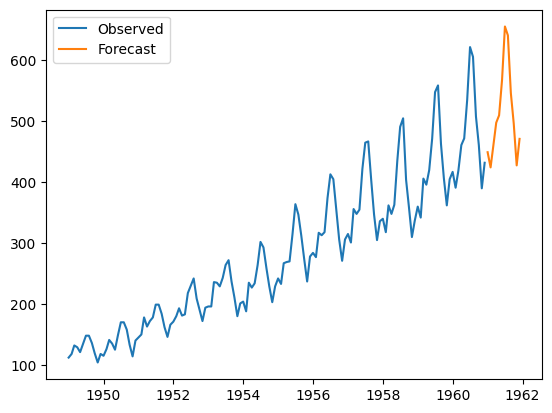

In [3]:

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

forecast = result.get_forecast(steps=12)
plt.plot(data, label='Observed')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.legend()
plt.show()


## Question 9: Local Outlier Factor

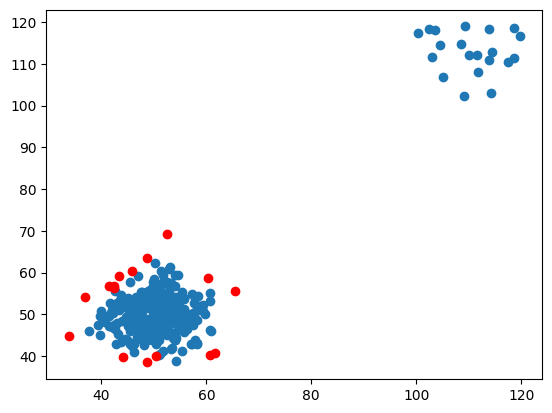

In [4]:

from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(X)

plt.scatter(X[y_pred==1][:,0], X[y_pred==1][:,1])
plt.scatter(X[y_pred==-1][:,0], X[y_pred==-1][:,1], color='red')
plt.show()


## Question 10: Power Grid Use Case


- **Anomaly Detection:** Isolation Forest / LOF
- **Forecasting:** SARIMAX with weather features
- **Monitoring:** Rolling RMSE, drift detection
- **Business Impact:** Prevent outages, optimize load
